<strong style="color:#F00">Rubric Grade</strong>

Category | Score
-------- | -----
R1 | 18
R2 | 18
F1 | 14
F2 | 18
C1 | 18
C2 | 18

Notes:
- R2: No concideration of spread of distribution in Q1.1.4, why average could represent all the other teams? But good investigation in the rest(get two points back)
- F1: Missing title for Q1.2.2

# STA 141B Assignment 5

Due __Mar 4, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice accessing and analyzing data in a database.

__For full credit, do most of your work in SQL.__ Subsetting, sorting, grouping, aggregation, and merging can all be done in SQL. It is okay to use Python code for parts of your analysis that are difficult or impossible to do in SQL, such as creating visualizations or computing statistics (other than the mean).

## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

In [66]:
import numpy as np
import pandas as pd

import sqlite3 as sql

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = sql.connect("baseball.sqlite")

In [321]:
pd.read_sql("""
    SELECT yearID, teamID, MAX(payroll) AS max_payroll FROM
        (SELECT yearID, teamID, SUM(salary) AS payroll FROM salaries
        WHERE yearid BETWEEN 2006 AND 2016
        GROUP BY teamID, yearID)
    GROUP BY teamID
    ORDER BY payroll DESC
    LIMIT 5
""", db)

,yearID,teamID,max_payroll
0,2013,NYA,231978886
1,2013,LAN,223362196
2,2016,DET,194876481
3,2016,BOS,188545761
4,2014,PHI,180944967


Teams with the top 5 payrolls: NYA, LAN, DET, BOS, PHI. Now let's get the team names and a DataFrame that only contains these teams' payrolls over the specified time interval.

In [298]:
df1 = pd.read_sql("""
    SELECT l.yearID, r.name, r.teamID, payroll FROM
        (SELECT sum(salary) as payroll, yearID, teamID, lgID FROM salaries
        WHERE yearID BETWEEN 2006 AND 2016
        GROUP BY yearID, teamID) AS l
    JOIN
        (SELECT DISTINCT yearID, teamID, name FROM teams
        WHERE lgID IN ('AL', 'NL') AND yearID BETWEEN 2006 AND 2016) AS r
    ON l.teamID = r.teamID AND l.yearID = r.yearID
    WHERE l.teamID IN ('NYA', 'LAN', 'DET', 'BOS', 'PHI')
    ORDER BY name, l.yearID
""", db)

df1 # Top 5 payroll teams

,yearID,name,teamID,payroll
0,2006,Boston Red Sox,BOS,120099824
1,2007,Boston Red Sox,BOS,143026214
2,2008,Boston Red Sox,BOS,133390035
3,2009,Boston Red Sox,BOS,121345999
4,2010,Boston Red Sox,BOS,162447333
5,2011,Boston Red Sox,BOS,161762475
6,2012,Boston Red Sox,BOS,173186617
7,2013,Boston Red Sox,BOS,151530000
8,2014,Boston Red Sox,BOS,139019929
9,2015,Boston Red Sox,BOS,181103400


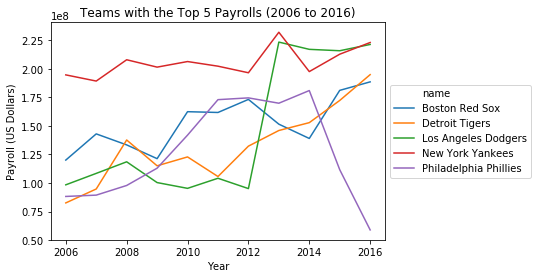

In [299]:
ax = sns.lineplot("yearID", "payroll", hue = "name", data = df1)
    
ax.set_title("Teams with the Top 5 Payrolls (2006 to 2016)")
ax.set_xlabel("Year")
ax.set_ylabel("Payroll (US Dollars)")

# Put a legend to the right of the current axis
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

Examining the graph of the 5 teams with the highest payrolls shows that there is a general increasing trend in payrolls over the 2006-2016 period. Since the payroll figures are given in nominal dollars, this trend could be attributed to inflation. There do appear to be two anomalies to this trend, however. The LA Dodgers had a large spike in their payroll in 2013 compared to their payroll in 2012, and the Philadelphia Phillies had sharp decreases in their payroll from 2014 to 2015 and from 2015 to 2016. After some investigating into these anomalies, I discovered that the LA Dodgers changed management from Frank McCourt to Guggenheim Baseball Management during 2012, so perhaps a new management philosophy could have contributed to the sudden increase in payroll. Indeed, Wikipedia states "the new ownership group put their stamp on the team quickly by making a number of big trades and putting more money into the team than McCourt did." The Philadelphia Phillies had a poor 2013 season, leading to a decision to change coaches for the 2014 season. Unfortunately, they continued performing poorly in 2014 and 2015, finishing the 2015 season with the worst record in the majors. This could have contributed to the sharp decline in payroll for the Phillies, as their poor record might have caused the team's management to restructure and rebuild the team with lower salary players.

To compare the teams with the five highest payrolls to the other teams, let's take the average of the other teams' payrolls for each year. Then we'll combine this average "team" payroll data with our top 5 teams into a new DataFrame so we can compare the average (non-top 5) team to the top 5 teams graphically.

In [183]:
df2 = pd.read_sql("""
    SELECT yearID, AVG(payroll) AS payroll FROM
        (SELECT yearID, teamid, SUM(salary) AS payroll
        FROM salaries
        WHERE (yearID BETWEEN 2006 AND 2016
            AND lgID IN ('AL', 'NL')
            AND teamID NOT IN ('NYA', 'LAN', 'DET', 'BOS', 'PHI'))
        GROUP BY yearID, teamID)
    GROUP BY yearID
""", db)

df2

,yearID,payroll
0,2006,6.949505e+07
1,2007,7.406882e+07
2,2008,7.957673e+07
3,2009,8.053712e+07
4,2010,7.969711e+07
5,2011,8.150409e+07
6,2012,8.644199e+07
7,2013,8.447208e+07
8,2014,9.219755e+07
9,2015,1.048207e+08


In [184]:
df2["name"] = "Average of Other Teams"
df2["teamID"] = "AVG"
df2 = df2[["yearID", "name", "teamID", "payroll"]]

df2

,yearID,name,teamID,payroll
0,2006,Average of Other Teams,AVG,6.949505e+07
1,2007,Average of Other Teams,AVG,7.406882e+07
2,2008,Average of Other Teams,AVG,7.957673e+07
3,2009,Average of Other Teams,AVG,8.053712e+07
4,2010,Average of Other Teams,AVG,7.969711e+07
5,2011,Average of Other Teams,AVG,8.150409e+07
6,2012,Average of Other Teams,AVG,8.644199e+07
7,2013,Average of Other Teams,AVG,8.447208e+07
8,2014,Average of Other Teams,AVG,9.219755e+07
9,2015,Average of Other Teams,AVG,1.048207e+08


In [160]:
top5_vs_avg = pd.concat([df1, df2], ignore_index = True)

top5_vs_avg

,yearID,name,teamID,payroll
0,2006,Boston Red Sox,BOS,1.200998e+08
1,2007,Boston Red Sox,BOS,1.430262e+08
2,2008,Boston Red Sox,BOS,1.333900e+08
3,2009,Boston Red Sox,BOS,1.213460e+08
4,2010,Boston Red Sox,BOS,1.624473e+08
5,2011,Boston Red Sox,BOS,1.617625e+08
6,2012,Boston Red Sox,BOS,1.731866e+08
7,2013,Boston Red Sox,BOS,1.515300e+08
8,2014,Boston Red Sox,BOS,1.390199e+08
9,2015,Boston Red Sox,BOS,1.811034e+08


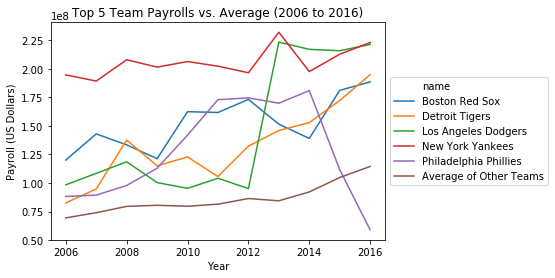

In [304]:
ax = sns.lineplot("yearID", "payroll", hue = "name", data = top5_vs_avg)
    
ax.set_title("Top 5 Team Payrolls vs. Average (2006 to 2016)")
ax.set_xlabel("Year")
ax.set_ylabel("Payroll (US Dollars)")

# Put a legend to the right of the current axis
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
ax

By comparing the graphs of the top 5 team payrolls to the average of the other teams' payrolls for each year, we can see that the highest payroll teams are consistently higher than the other teams' average payroll in each year (with the exception of the Phillies, who dip below the average payroll curve in 2016). In the case of the New York Yankees, their payroll is consistently about double that of the average of the non-top 5 teams.

__Exercise 1.2.__ Ask and use the database to answer 3 questions about baseball. For each question, write at least 2-3 paragraphs (~150 words) and support your answer with plots. If you feel like you don't have enough to write for a question, you probably aren't investigating follow up questions (inspired your original question) as carefully as you should.

__Try to come up with your own questions__, but here are two examples of reasonable questions:

* Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
* How much have salaries increased over the years in [real dollars](https://en.wikipedia.org/wiki/Real_versus_nominal_value_(economics))? The `salary` column in the `Salaries` table is in nominal dollars, so you will need to get Consumer Price Index data online if you want to answer this question. Is there a corresponding increase in performance?

Please make sure to clearly state each of your questions in your submission.

## My Questions

__1. How much have payrolls increased over the years in real dollars?__

First, let's extract the average payroll for each year like we did in 1.1.4, but without excluding any teams. Then we'll make a line plot of the data. I decided to focus on just the major league teams since their payrolls are typically higher than the lesser leagues.

In [302]:
avg_payroll = pd.read_sql("""
    SELECT yearID, AVG(payroll) AS payroll FROM
        (SELECT yearID, teamid, SUM(salary) AS payroll
        FROM salaries
        WHERE lgID IN ('AL', 'NL')
        GROUP BY yearID, teamID)
    GROUP BY yearID
""", db)

avg_payroll

,yearID,payroll
0,1985,1.007557e+07
1,1986,1.184056e+07
2,1987,1.048367e+07
3,1988,1.155586e+07
4,1989,1.384599e+07
5,1990,1.707235e+07
6,1991,2.357879e+07
7,1992,3.098244e+07
8,1993,3.220500e+07
9,1994,3.313701e+07


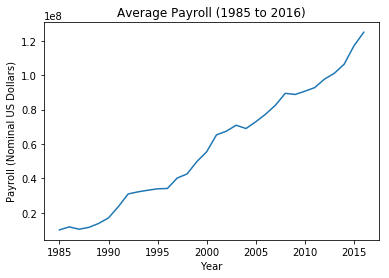

In [306]:
ax = sns.lineplot("yearID", "payroll", data = avg_payroll)
    
ax.set_title("Average Payroll (1985 to 2016)")
ax.set_xlabel("Year")
ax.set_ylabel("Payroll (Nominal US Dollars)")

ax

In [307]:
# Account for inflation in payrolls

inflation = pd.Series([1, 0.96, 0.95, 0.91, 0.87, 0.83, 0.78, 0.76, 0.74, 0.72, 0.70, 0.68, 0.66, 0.65, 0.64, 0.62, 0.60, 0.60, 0.58, 0.57, 0.55, 0.53, 0.52, 0.50, 0.50, 0.49, 0.48, 0.47, 0.46, 0.45, 0.45, 0.45])

avg_payroll["payroll_adj"] = avg_payroll["payroll"] * inflation

avg_payroll = avg_payroll.set_index("yearID")

avg_payroll

,payroll,payroll_adj
yearID,,
1985,1.007557e+07,1.007557e+07
1986,1.184056e+07,1.136694e+07
1987,1.048367e+07,9.959485e+06
1988,1.155586e+07,1.051583e+07
1989,1.384599e+07,1.204601e+07
1990,1.707235e+07,1.417005e+07
1991,2.357879e+07,1.839145e+07
1992,3.098244e+07,2.354665e+07
1993,3.220500e+07,2.383170e+07


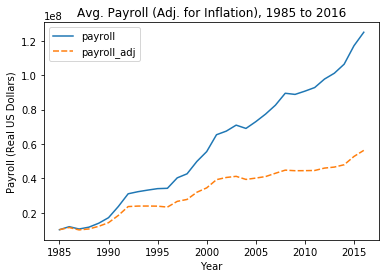

In [311]:
ax = sns.lineplot(data = avg_payroll)
    
ax.set_title("Avg. Payroll (Adj. for Inflation), 1985 to 2016")
ax.set_xlabel("Year")
ax.set_ylabel("Payroll (Real US Dollars)")

ax

In the chart above, the blue line represents the average payroll each year, and the dashed orange line represents the average payroll each year adjusted to compensate for the inflation of the U.S. Dollar. The adjustment was accomplished by manually finding the Consumer Price Index value of the dollar for each year compared to the value of the dollar in 1985 (the first year we had salary data available). This was a lengthy process since I had to use their online calculator to compare the value of the dollar to that of a dollar in 1985 for each of the 32 years. I stored these inflation adjustments in a list and then multiplied them with the average payroll for each year, giving the real dollar value (that is, the value adjusted for inflation) of the average payroll for each year. Even after adjusting for inflation, we can see that the average team payroll has been steadily increasing over the 32-year period.

__2. Is there a relationship between RBI (runs batted in) and salary for position players?__

In [261]:
salary_rbi = pd.read_sql("""
    SELECT l.yearID, (nameFirst || ' ' || nameLast) AS name, salary, RBI FROM
        (SELECT li.yearID, li.playerID, salary, RBI FROM
            ((SELECT yearID, playerID, salary FROM salaries
            WHERE playerID IN ('rodrial01', 'jeterde01', 'ramirma02', 'pujolal01', 'bondsba01')) AS li
            JOIN
            (SELECT yearID, playerID, RBI FROM batting
            WHERE playerID IN ('rodrial01', 'jeterde01', 'ramirma02', 'pujolal01', 'bondsba01')) AS ri
            ON li.playerID = ri.playerID AND li.yearID = ri.yearID)) AS l
        JOIN
        (SELECT playerID, nameFirst, nameLast FROM people) AS r
        ON l.playerid = r.playerid
        ORDER BY l.playerID, yearID
""", db)

salary_rbi

,yearID,name,salary,RBI
0,1986,Barry Bonds,60000,48.0
1,1987,Barry Bonds,100000,59.0
2,1988,Barry Bonds,220000,58.0
3,1989,Barry Bonds,360000,58.0
4,1990,Barry Bonds,850000,114.0
5,1991,Barry Bonds,2300000,116.0
6,1992,Barry Bonds,4800000,103.0
7,1993,Barry Bonds,4516666,123.0
8,1994,Barry Bonds,5166666,81.0
9,1995,Barry Bonds,8166666,104.0


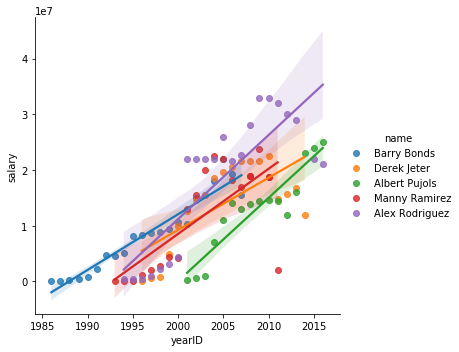

In [267]:
ax = sns.lmplot("yearID", "salary", hue = "name", truncate = True, data = salary_rbi)
# ax = sns.lineplot("yearID", "salary", hue = "name", data = salary_rbi)
    
# ax.set_title("Salary vs. RBI")
# ax.set_xlabel("Runs Batted In")
# ax.set_ylabel("Salary (US Dollars)")

# Put a legend to the right of the current axis
# ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))



In [374]:
rbi_df = pd.read_sql("""
    SELECT l.playerid, nameFirst, nameLast, total_RBI, total_salary FROM
        (SELECT li.playerid, nameFirst, nameLast, total_RBI FROM 
            (SELECT playerid, SUM(RBI) as total_RBI FROM batting
            GROUP BY playerid) AS li
        JOIN
            (SELECT playerid, nameFirst, nameLast FROM people) AS ri
        ON li.playerid = ri.playerid) AS l
    INNER JOIN
        (SELECT playerid, SUM(salary) as total_salary FROM salaries
        GROUP BY playerid) AS r
    ON l.playerid = r.playerid
    ORDER BY total_RBI DESC
""", db)

rbi_df

,playerid,nameFirst,nameLast,total_RBI,total_salary
0,rodrial01,Alex,Rodriguez,2086.0,398416252
1,bondsba01,Barry,Bonds,1996.0,188245322
2,pujolal01,Albert,Pujols,1982.0,204040436
3,murraed02,Eddie,Murray,1917.0,30309223
4,griffke02,Ken,Griffey,1836.0,151703682
5,palmera01,Rafael,Palmeiro,1835.0,89295996
6,winfida01,Dave,Winfield,1833.0,23095088
7,ramirma02,Manny,Ramirez,1831.0,206827769
8,ortizda01,David,Ortiz,1768.0,160012500
9,beltrad01,Adrian,Beltre,1707.0,183140000


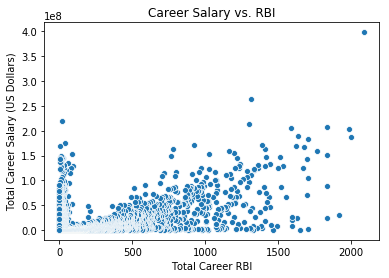

In [114]:
ax = sns.scatterplot("total_RBI", "total_salary", data = rbi_df)
    
ax.set_title("Career Salary vs. RBI")
ax.set_xlabel("Total Career RBI")
ax.set_ylabel("Total Career Salary (US Dollars)")

ax

__3. Is there a relationship between OPS (on-base plus slugging) and salary for hitters?__

On-base plus slugging (OPS) is a fairly common statistic used to compare and rank hitters in baseball. It is calculated by adding a player's on-base percentage (OBP) to their slugging average. Slugging average can be found by dividing the player's total bases ($TB$) by their at bats ($AB$). Since our database did not include a $TB$ count for the players, I had to calculate it by taking the weighted sum of base counts ($1B$ is singles, $2B$ doubles, $3B$ triples, and $HR$ homeruns):

$$ TB = (1 \times 1B) + (2 \times 2B) + (3 \times 3B) + (4 \times HR) $$

Annoyingly, the database was also lacking the singles count, so I had to compute that as $ 1B = H - 2B - 3B - HR $ since I'm interpreting hits ($H$) to be the sum of all base hit counts. Combining these two formulas gave me the following:

$$ TB = (H - 2B - 3B - HR) + (2 \times 2B) + (3 \times 3B) + (4 \times HR) = H + (1 \times 2B) + (2 \times 3B) + (3 \times HR)$$

Dividing $TB$ by $AB$ gives the player's slugging average, and then their OBP can be found with this formula:

$$ OBP = \frac{H + BB + HBP}{AB + BB + SF + HBP}, $$

where $H$ is hits, $BB$ is walks, $HBP$ is times hit by pitch, and $SF$ is sacrifice flies (thankfully, all of these counts were provided in the database). Adding OBP to the slugging average gives the player's on-base plus slugging stat.

I began by choosing a few well-known players and examined their salary and OPS for each season of their careers. I experimented with several different ways of plotting these stats for each player, but didn't find anything too revealing from the plots. I did however make some plots that show how the players' salaries change over their careers, while the size and color of the dots correspond to the OPS. The players' OPS stats appear to be relatively constant through their careers, but the graphs for Derek Jeter and Alex Rodriguez show a decline in their OPS as well as salary towards the end of their careers.

In [383]:
salary_ops_few = pd.read_sql("""
    SELECT l.yearID, (nameFirst || ' ' || nameLast) AS name, salary, OPS FROM
        (SELECT li.yearID, li.playerID, salary, OPS FROM
            ((SELECT yearID, playerID, salary FROM salaries
            WHERE playerID IN ('rodrial01', 'jeterde01', 'ramirma02', 'pujolal01', 'bondsba01')) AS li
            JOIN
            (SELECT yearID, playerID, ((1.0*(H + `2B` + 2*`3B` + 3*HR)/AB) + (H+BB+HBP)/(AB+BB+SF+HBP)) AS OPS FROM batting
            WHERE playerID IN ('rodrial01', 'jeterde01', 'ramirma02', 'pujolal01', 'bondsba01')) AS ri
            ON li.playerID = ri.playerID AND li.yearID = ri.yearID)) AS l
        JOIN
        (SELECT playerID, nameFirst, nameLast FROM people) AS r
        ON l.playerid = r.playerid
        ORDER BY l.playerID, yearID
""", db)

salary_ops_few

,yearID,name,salary,OPS
0,1986,Barry Bonds,60000,0.746340
1,1987,Barry Bonds,100000,0.820802
2,1988,Barry Bonds,220000,0.858784
3,1989,Barry Bonds,360000,0.776895
4,1990,Barry Bonds,850000,0.970344
5,1991,Barry Bonds,2300000,0.923820
6,1992,Barry Bonds,4800000,1.079561
7,1993,Barry Bonds,4516666,1.135637
8,1994,Barry Bonds,5166666,1.073219
9,1995,Barry Bonds,8166666,1.008571


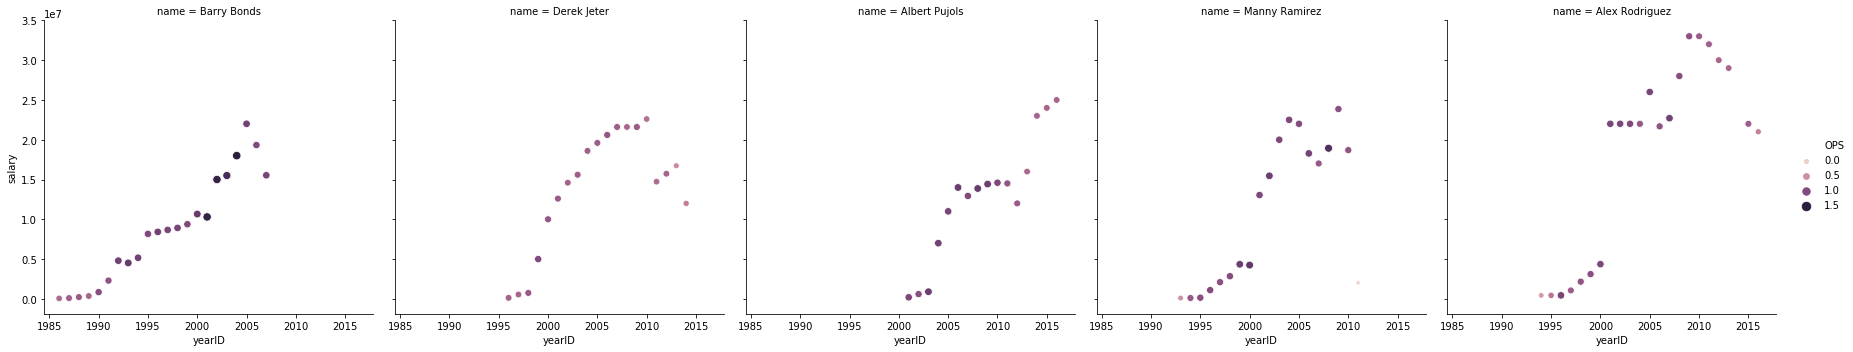

In [384]:
ax = sns.relplot(x = "yearID", y = "salary", col = "name", size = "OPS", hue = "OPS", data = salary_ops_few)

Thinking there may be more to this trend, I then decided to expand my dataset to include only players who have never pitched (pitchers were throwing off the trend since many pitchers have high salaries and low OPS) and who have had a career of at least 10 seasons in the majors (to encourage more robust data). This gave me a dataset of 966 hitters to work with. I found each hitter's average yearly salary and average yearly OPS and plotted each of the data points in a scatterplot to look for a relationship. The size and color of the dots correspond to the length of that player's career, in order to represent even more robust data points.

In [385]:
salary_ops_all = pd.read_sql("""
    SELECT (nameFirst || ' ' || nameLast) AS name, career, AVG(salary) AS avg_salary, AVG(OPS) AS avg_ops FROM
        ((SELECT li.yearID, li.playerID, salary, OPS FROM
            ((SELECT yearID, playerID, salary FROM salaries) AS li
            JOIN
            (SELECT yearID, playerID,
            ((1.0*(H + `2B` + 2*`3B` + 3*HR)/AB) + (H+BB+HBP)/(AB+BB+SF+HBP)) AS OPS
            FROM batting) AS ri
            ON li.playerID = ri.playerID AND li.yearID = ri.yearID)) AS l
        JOIN
        (SELECT playerID, nameFirst, nameLast, (finalGame - debut) + 1 AS career FROM people) AS r
        ON l.playerID = r.playerID) AS a
        LEFT JOIN
        (SELECT playerID FROM pitching) AS b
        ON a.playerID = b.playerID
        WHERE b.playerID IS NULL AND career > 9
    GROUP BY a.playerID
    ORDER BY avg_ops DESC
""", db)

salary_ops_all

,name,career,avg_salary,avg_ops
0,Barry Bonds,22,8.556606e+06,1.057033
1,Curtis Pride,14,1.814000e+05,1.036479
2,Mark McGwire,16,4.814021e+06,0.981814
3,Larry Walker,17,7.689381e+06,0.980131
4,Chipper Jones,20,8.918060e+06,0.968845
5,Albert Pujols,18,1.275253e+07,0.962435
6,Hensley Meulens,10,1.068333e+05,0.957886
7,Ryan Klesko,16,4.011700e+06,0.956804
8,Miguel Cabrera,16,1.345790e+07,0.956271
9,Joey Votto,12,9.453829e+06,0.952853


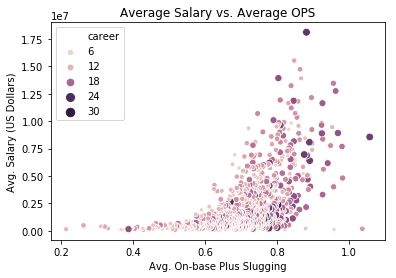

In [386]:
ax = sns.scatterplot(x = "avg_ops", y = "avg_salary", size = "career", hue = "career", data = salary_ops_all)

ax.set_title("Average Salary vs. Average OPS")
ax.set_ylabel("Avg. Salary (US Dollars)")
ax.set_xlabel("Avg. On-base Plus Slugging")

ax

From the above scatterplot, it is clear that there is a strong positive correlation between OPS and average yearly salary once the OPS is above about 0.6. Coincidentally, an OPS of 0.6334 is considered the low end of 'Below Average' according to Bill James' essay "The 96 Families of Hitters," which uses OPS as one method to classify hitters. So, if a hitter has a high OPS average, there is a good chance they will have a high average salary as well. If I had more time, I would have liked to normalize the salaries to adjust for inflation like I did for 1.2.1. This could have given a more clear picture of the relationship between OPS and average salary since the real value of the dollar has been decreasing over time. Without compensating for inflation it doesn't make sense to compare, for example, the average salary from a 10-year career ending in 1995 to the average salary from a 10-year career ending in 2015.

## Other Questions

__How does switching teams affect average salary?__

In [394]:
pd.read_sql("""
    SELECT yearID, teamID, playerID, AVG(salary) FROM salaries
    GROUP BY teamID, playerID
    ORDER BY playerID, yearID
""", db)

,yearID,teamID,playerID,AVG(salary)
0,2004,SFN,aardsda01,3.000000e+05
1,2007,CHA,aardsda01,3.875000e+05
2,2008,BOS,aardsda01,4.032500e+05
3,2009,SEA,aardsda01,2.556333e+06
4,2012,NYA,aardsda01,5.000000e+05
5,1986,BAL,aasedo01,6.333333e+05
6,1989,NYN,aasedo01,4.000000e+05
7,2006,CIN,abadan01,3.270000e+05
8,2011,HOU,abadfe01,4.515000e+05
9,2014,OAK,abadfe01,8.067000e+05


__Who had the longest career?__

In [388]:
pd.read_sql("""
    SELECT playerID, (nameFirst || ' ' || nameLast) AS name, debut, finalGame, (finalGame - debut) + 1 AS career
    FROM people
    ORDER BY career DESC
    LIMIT 15
""", db)

,playerID,name,debut,finalGame,career
0,altroni01,Nick Altrock,1898-07-14,1933-10-01,36
1,orourji01,Jim O'Rourke,1872-04-26,1904-09-22,33
2,minosmi01,Minnie Minoso,1949-04-19,1980-10-05,32
3,olearch01,Charley O'Leary,1904-04-14,1934-09-30,31
4,lathaar01,Arlie Latham,1880-07-05,1909-09-30,30
5,mcguide01,Deacon McGuire,1884-06-21,1912-05-18,29
6,eversjo01,Johnny Evers,1902-09-01,1929-10-06,28
7,jennihu01,Hughie Jennings,1891-06-01,1918-09-02,28
8,ryanno01,Nolan Ryan,1966-09-11,1993-09-22,28
9,streega01,Gabby Street,1904-09-13,1931-09-20,28


__Who were the highest payed players of all time?__

In [395]:
pd.read_sql("""
    SELECT l.playerid, nameFirst, nameLast, total_salary FROM 
        (SELECT playerid, SUM(salary) as total_salary FROM salaries
        GROUP BY playerid) AS l
    JOIN
        (SELECT playerid, nameFirst, nameLast FROM people) AS r
    ON l.playerid = r.playerid
    ORDER BY total_salary DESC
    LIMIT 15
""", db)

,playerid,nameFirst,nameLast,total_salary
0,rodrial01,Alex,Rodriguez,398416252
1,jeterde01,Derek,Jeter,264618093
2,sabatcc01,CC,Sabathia,218642856
3,teixema01,Mark,Teixeira,214275000
4,ramirma02,Manny,Ramirez,206827769
5,beltrca01,Carlos,Beltran,205782782
6,pujolal01,Albert,Pujols,204040436
7,cabremi01,Miguel,Cabrera,188410623
8,bondsba01,Barry,Bonds,188245322
9,beltrad01,Adrian,Beltre,183140000
